In [1]:
import requests 
import pandas as pd 
import datetime



In [2]:
start = datetime.datetime.now()
print("Start time: ", start)
cursorMark = "*"
nextCursorMark = None
all_docs = []  # Liste pour stocker tous les résultats
page = 0
while True:
    base_url = "https://api.archives-ouvertes.fr/search/"
    params = {
        "domain_s": "shs.info",
        "rows": 1000,
        "fl": "docid,title_s,abstract_s,fr_keyword_s,publicationDate_tdate",
        "cursorMark": cursorMark,
        "sort": "docid asc",
        "q": (
        "fr_keyword_s:IA OR \"intelligence artificielle\" OR ChatGPT OR "
        "\"machine learning\" OR \"apprentissage automatique\" OR \"deep learning\" OR "
        "\"apprentissage profond\" OR \"réseaux de neurones\" OR "
        "\"traitement automatique du langage naturel\" OR TALN OR NLP OR GPT OR "
        "robotique OR \"systèmes intelligents\" OR \"agents intelligents\" OR "
        "\"vision par ordinateur\" OR \"computer vision\" OR \"analyse de données\" OR "
        "\"data science\" OR automatisation"
    ),
        "facet.prefix":"IA",
    }    
    response = requests.get(base_url, params=params)

    data = response.json()
    docs = data["response"]["docs"]
    all_docs.extend(docs)  # Ajoute les nouveaux résultats à la liste globale
    nextCursorMark = data["nextCursorMark"]
    if nextCursorMark == cursorMark:
        break
    cursorMark = nextCursorMark
    page += 1
    print(f"Page {page} fetched. Total documents: {len(all_docs)}")
# Traitement des résultats
df = pd.DataFrame(all_docs)
df.to_csv("shs_info.csv", index=False, encoding="utf-8")
end = datetime.datetime.now()
print("End time: ", end)
print("Duration: ", end - start)
print("Total rows: ", len(df))

Start time:  2025-04-18 14:02:30.495762
Page 1 fetched. Total documents: 1000
Page 2 fetched. Total documents: 2000
Page 3 fetched. Total documents: 3000
Page 4 fetched. Total documents: 4000
Page 5 fetched. Total documents: 5000
Page 6 fetched. Total documents: 6000
Page 7 fetched. Total documents: 7000
Page 8 fetched. Total documents: 8000
Page 9 fetched. Total documents: 9000
Page 10 fetched. Total documents: 10000
Page 11 fetched. Total documents: 11000
Page 12 fetched. Total documents: 12000
Page 13 fetched. Total documents: 13000
Page 14 fetched. Total documents: 14000
Page 15 fetched. Total documents: 15000
Page 16 fetched. Total documents: 16000
Page 17 fetched. Total documents: 17000
Page 18 fetched. Total documents: 18000
Page 19 fetched. Total documents: 19000
Page 20 fetched. Total documents: 20000
Page 21 fetched. Total documents: 21000
Page 22 fetched. Total documents: 22000
Page 23 fetched. Total documents: 23000
Page 24 fetched. Total documents: 24000
Page 25 fetched. T

In [3]:
df = pd.read_csv("shs_info.csv", encoding="utf-8")
df = df.drop_duplicates(subset=["docid"])
df = df.reset_index(drop=True)
df = df.dropna(subset=["fr_keyword_s"])  # Ne supprime les lignes que si fr_keyword_s est NaN
df['year'] = pd.to_datetime(df['publicationDate_tdate'], errors='coerce').dt.year
df = df.drop(columns=["publicationDate_tdate"])  # Supprime la colonne date complète


print(len(df))
df.head(10)

25087


,docid,title_s,abstract_s,fr_keyword_s,year
8,100041,['Combining Higher-Order Wavelets and Disconti...,['The radiosity method is used for global illu...,"['Discontinuity meshing', 'Maillage de discont...",2004
11,100072,['FPNA: concepts and properties'],['Neural networks are usually considered as na...,"['Réseaux de neurones', 'Neural networks', 'Fi...",2004
12,100073,['FPNA: applications and implementations'],['Neural networks are usually considered as na...,"['Parallélisme à grain fin', 'Réseaux de neuro...",2004
13,100074,['New classification quality estimators for an...,"[""In the procedure of information analysis, on...","['Neural networks', 'Classification', 'Quality...",2004
14,100075,['Optimized Data Analysis Based on Neural Netw...,['This paper summarizes our experiments in tex...,"['Neural network', 'Fouille des données du web...",2004
16,100080,['Parallel FPGA implementation of self-organiz...,['This paper presents an area-saving parallel ...,"['Low-power', 'Vigilance', 'Alertness', 'Neura...",2004
18,100084,"[""Implantation basse-consommation de cartes au...","[""Plusieurs études ont déjà été menées pour te...","['Low-power', 'Réseaux de neurones', 'Neural n...",2004
20,1000928,['A decision-support scheme for mapping endang...,['This paper describes a decision-support sche...,"['Decision making model', 'Risk assessment', '...",2012
28,100135,['Optimal routing in two parallel queues'],['This paper deals with the problem of the com...,"['Open loop routing parallel queues', ""Files d...",2004
29,100151,['Classification and Predictive maps on ore de...,"['To obtain a good modeling of a phenomenon, d...","['Ore deposits', 'Carte de prédictivité', 'Gis...",2004


In [4]:
import ast

def extract_keywords(cell):
    if pd.isna(cell):
        return []
    if isinstance(cell, list):
        return cell
    try:
        # Essayer de convertir la chaîne en liste si c'est le format ['mot1', 'mot2']
        val = ast.literal_eval(cell)
        if isinstance(val, list):
            return val
    except (ValueError, SyntaxError):
        pass
    # Sinon, séparer par ';'
    return [kw.strip() for kw in str(cell).split(';') if kw.strip()]

# Mettre tous les mots-clés en minuscule pour éviter les répétitions
all_keywords = df['fr_keyword_s'].apply(extract_keywords).explode().str.strip().str.lower()
keywords_counts = all_keywords.value_counts().reset_index()
keywords_counts.columns = ['Keyword', 'Count']
keywords_counts = keywords_counts.sort_values(by='Count', ascending=False)
for idx, row in keywords_counts.iterrows():
    print(f"{row['Keyword']}: {row['Count']}")

intelligence artificielle: 2535
apprentissage automatique: 1453
apprentissage profond: 1205
robotique: 726
réseaux de neurones: 629
vision par ordinateur: 576
analyse de données: 479
machine learning: 467
automatisation: 422
apprentissage: 411
modélisation: 387
classification: 368
informatique: 362
optimisation: 349
apprentissage machine: 266
ia: 254
deep learning: 252
apprentissage statistique: 245
apprentissage par renforcement: 221
simulation: 219
segmentation: 206
réseaux de neurones artificiels: 191
cemagref: 182
traitement automatique des langues: 155
fouille de données: 154
ontologie: 141
traitement automatique du langage naturel: 136
traitement du signal: 135
traitement d'images: 134
sécurité: 134
réseau de neurones: 134
télédétection: 131
réalité virtuelle: 131
imagerie médicale: 124
big data: 120
aide à la décision: 120
localisation: 118
apprentissage supervisé: 117
séries temporelles: 116
prédiction: 115
éthique: 114
tal: 114
algorithme: 110
diagnostic: 109
numérique: 108
ro

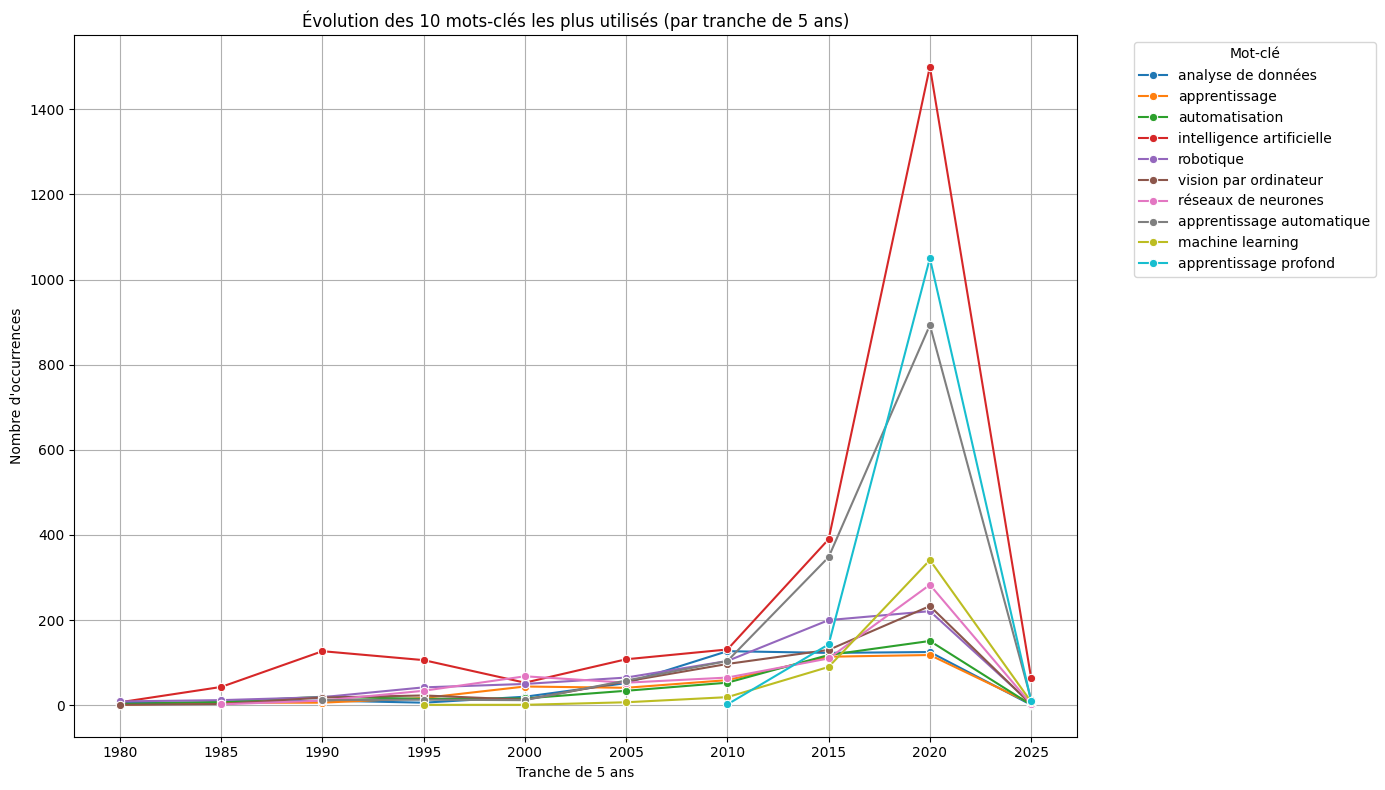

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Appliquer l'extraction
df['keywords_list'] = df['fr_keyword_s'].apply(extract_keywords).apply(lambda lst: [kw.lower() for kw in lst])

# Trouver les 10 mots-clés les plus fréquents
from collections import Counter
all_keywords = [kw for sublist in df['keywords_list'] for kw in sublist]
top10 = [kw for kw, _ in Counter(all_keywords).most_common(10)]

# Préparer les données pour le graphique
df_exploded = df.explode('keywords_list')
df_top10 = df_exploded[df_exploded['keywords_list'].isin(top10)]
keywords_by_year = df_top10.groupby(['year', 'keywords_list']).size().reset_index(name='count')

# Créer des tranches de 5 ans à partir de 2000
bins = np.arange(1980, df['year'].max() + 6, 5)
labels = bins[:-1]
keywords_by_year['year_group'] = pd.cut(keywords_by_year['year'], bins=bins, labels=labels, right=False).astype(float)

# Grouper par tranche de 5 ans et mot-clé
keywords_by_5years = keywords_by_year.groupby(['year_group', 'keywords_list'])['count'].sum().reset_index()

# Tracer avec seaborn
plt.figure(figsize=(14,8))
sns.lineplot(
    data=keywords_by_5years,
    x='year_group',
    y='count',
    hue='keywords_list',
    marker='o'
)
plt.xlabel("Tranche de 5 ans")
plt.ylabel("Nombre d'occurrences")
plt.title("Évolution des 10 mots-clés les plus utilisés (par tranche de 5 ans)")
plt.xticks(labels)  # Affiche 2000, 2005, 2010, etc.
plt.legend(title="Mot-clé", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

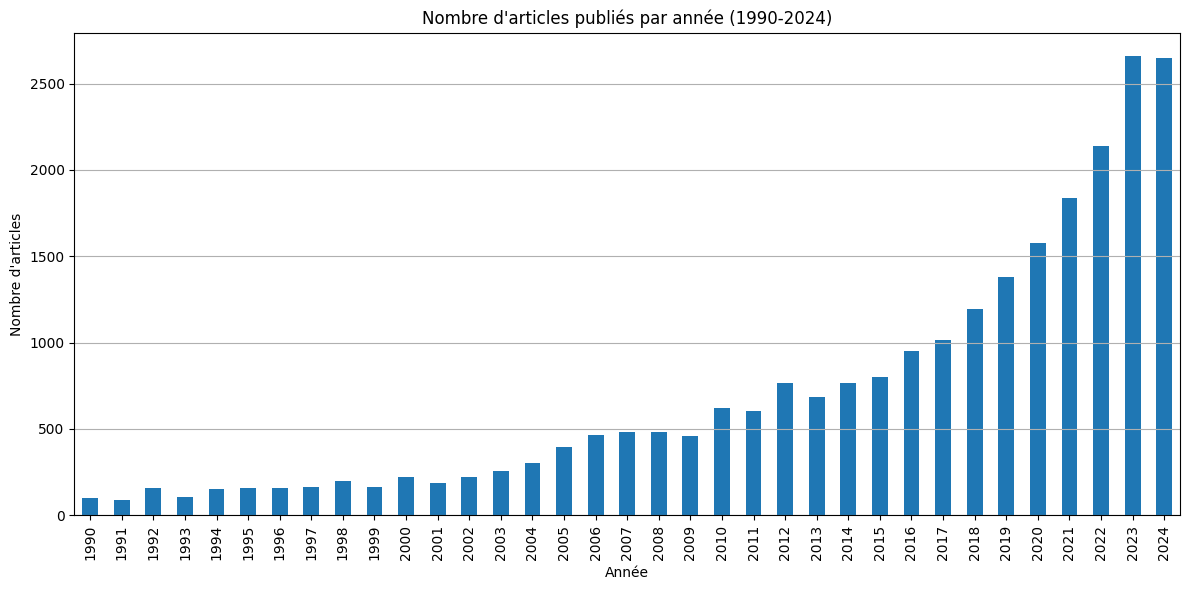

In [ ]:
# Définir la plage d'années souhaitée
years = np.arange(1990, 2025)

# Compter le nombre d'articles par année et réindexer pour inclure toutes les années de 1990 à 2024
articles_per_year = df['year'].value_counts().reindex(years, fill_value=0).sort_index()

plt.figure(figsize=(12,6))
articles_per_year.plot(kind='bar')
plt.xlabel("Année")
plt.ylabel("Nombre d'articles")
plt.title("Nombre d'articles publiés par année (1990-2024)")
plt.grid(axis='y')
plt.tight_layout()
plt.show()